# BÀI THỰC HÀNH 1 – PHÂN LỚP TITANIC  
**Mô hình:** Decision Tree & Random Forest

## 1. Mục tiêu

- Làm quen với bài toán **phân lớp nhị phân (binary classification)** trên dữ liệu thực tế.  
- Thực hành quy trình:
  1. Khảo sát và tiền xử lý dữ liệu.
  2. Lựa chọn thuộc tính đầu vào.
  3. Xây dựng mô hình **Cây quyết định (Decision Tree)**.
  4. Xây dựng mô hình **Rừng cây ngẫu nhiên (Random Forest)**.
  5. Đánh giá và so sánh hiệu năng hai mô hình.


## 2. Giới thiệu bài toán

Bài toán đặt ra là **dự đoán khả năng sống sót của hành khách trên tàu Titanic** dựa trên một số thông tin cá nhân và vé tàu.  

Đây là một bài toán **phân lớp nhị phân**, trong đó:

- **Biến mục tiêu (target)**: `Survived`
  - `0` : hành khách không sống sót  
  - `1` : hành khách sống sót
- **Mục tiêu**: Xây dựng các mô hình học máy để dự đoán `Survived` từ các thuộc tính đầu vào, đồng thời so sánh hiệu năng của:
  - **Cây quyết định (Decision Tree)**  
  - **Rừng cây ngẫu nhiên (Random Forest)**

Bài toán Titanic là một bài toán kinh điển trong lĩnh vực khai phá dữ liệu và học máy, giúp sinh viên làm quen với việc xử lý dữ liệu dạng bảng (tabular data), tiền xử lý, xây dựng mô hình phân lớp và đánh giá kết quả.

---

# 1. Import thư viện

In [1]:
# ======================================================
# BÀI THỰC HÀNH 1 - PHÂN LỚP TITANIC
# Mô hình: Decision Tree & Random Forest
# ======================================================

# 1. Import thư viện
# ======================================================

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)


# 2. Đọc dữ liệu Titanic

In [2]:
# ======================================================
# 2. Đọc dữ liệu Titanic
# ======================================================

# Trên Kaggle:
df = pd.read_csv("train.csv")

# Nếu chạy local / Colab thì thay bằng:
# df = pd.read_csv("train.csv")

print("Kích thước dữ liệu:", df.shape)
df.head()


Kích thước dữ liệu: (891, 12)


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

- Dữ liệu được đọc từ file `train.csv` trong bộ dữ liệu Titanic trên Kaggle:  
  `df = pd.read_csv("/kaggle/input/titanic/train.csv")`.
- Kết quả in ra cho thấy **kích thước dữ liệu là (891, 12)** – gồm 891 hành khách và 12 cột thông tin.


# 3. Khám phá sơ bộ dữ liệu

In [3]:
# ======================================================
# 3. Khám phá sơ bộ dữ liệu
#    (phần này giúp bạn có screenshot cho báo cáo)
# ======================================================

print(df.info())
print("\nThống kê mô tả các cột số:")
print(df.describe())

print("\nSố lượng giá trị thiếu mỗi cột:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Thống kê mô tả các cột số:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
s

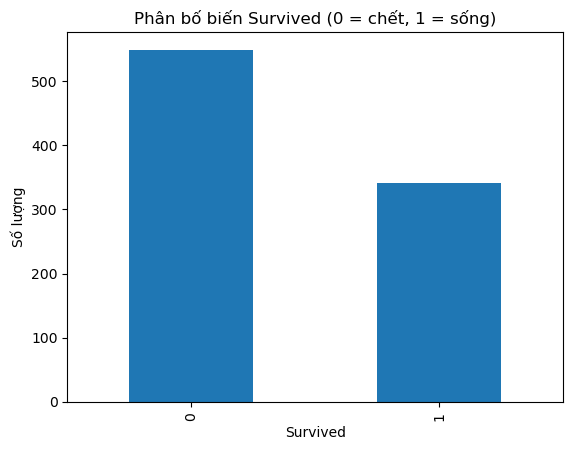

In [4]:
# (Tuỳ chọn) Vẽ phân bố biến Survived để minh hoạ
df['Survived'].value_counts().plot(kind='bar')
plt.title("Phân bố biến Survived (0 = chết, 1 = sống)")
plt.xlabel("Survived")
plt.ylabel("Số lượng")
plt.show()


Ở bước này, chương trình:

1. Gọi `df.info()` để xem:
   - Có 12 cột với các kiểu dữ liệu `int64`, `float64`, `object`.
   - Hầu hết các cột đầy đủ 891 giá trị, ngoại trừ:
     - `Age` chỉ có 714 giá trị (thiếu khá nhiều).  
     - `Cabin` chỉ có 204 giá trị (thiếu rất nhiều).  
     - `Embarked` có 889 giá trị (thiếu 2 dòng).  

2. Gọi `df.describe()` để xem thống kê mô tả cho các cột số (trung bình, độ lệch chuẩn, min, max…).

3. In `df.isnull().sum()` để đếm số lượng giá trị thiếu trên từng cột.

4. Vẽ biểu đồ cột cho biến `Survived`:
   - Số hành khách **không sống sót (0)** lớn hơn rõ rệt so với số hành khách **sống sót (1)**.  
   - Điều này cho thấy dữ liệu **hơi lệch lớp** (class imbalance nhẹ), cần lưu ý khi đánh giá mô hình.

# 4. Chọn thuộc tính & Tiền xử lý
    Ở đây chọn một số thuộc tính cơ bản:
    Pclass, Sex, Age, SibSp, Parch, Fare, Embarked

In [5]:
# ======================================================
# 4. Chọn thuộc tính & Tiền xử lý
#    Ở đây chọn một số thuộc tính cơ bản:
#    Pclass, Sex, Age, SibSp, Parch, Fare, Embarked
# ======================================================

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

X = df[features].copy()
y = df[target].copy()

# ------------------------------------------------------
# 4.1. Xử lý giá trị thiếu
#      - Age, Fare: điền bằng median
#      - Embarked: điền bằng mode (giá trị xuất hiện nhiều nhất)
# ------------------------------------------------------

X['Age'] = X['Age'].fillna(X['Age'].median())
X['Fare'] = X['Fare'].fillna(X['Fare'].median())
X['Embarked'] = X['Embarked'].fillna(X['Embarked'].mode()[0])

# ------------------------------------------------------
# 4.2. Mã hoá biến phân loại (Sex, Embarked)
#      Dùng one-hot encoding với pandas.get_dummies
#      drop_first=True để tránh đa cộng tuyến
# ------------------------------------------------------

X_encoded = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

print("Các cột sau khi mã hoá:")
print(X_encoded.columns)
X_encoded.head()


Các cột sau khi mã hoá:
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
0       3  22.0      1      0   7.2500      True       False        True
1       1  38.0      1      0  71.2833     False       False       False
2       3  26.0      0      0   7.9250     False       False        True
3       1  35.0      1      0  53.1000     False       False        True
4       3  35.0      0      0   8.0500      True       False        True

 **4.1. Lựa chọn thuộc tính**

Từ dữ liệu ban đầu, chương trình chọn 7 cột làm **đầu vào (features)**:

> `Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare`, `Embarked`

Biến mục tiêu là:

> `Survived`

**4.2. Xử lý giá trị thiếu**

Do một số cột có giá trị khuyết:

- `Age` và `Fare` được điền bằng **trung vị (median)** của từng cột.  
- `Embarked` được điền bằng **mode** – giá trị xuất hiện nhiều nhất.

Cách xử lý này giúp dữ liệu đầy đủ hơn mà vẫn hạn chế ảnh hưởng của ngoại lệ.

**4.3. Mã hoá biến phân loại**

Các cột dạng chữ (`Sex`, `Embarked`) được mã hoá sang dạng số bằng **one-hot encoding**:

```python
X_encoded = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

**Kết quả ta thu được các cột:**

- Pclass, Age, SibSp, Parch, Fare,

- Sex_male (1 nếu là nam, 0 nếu là nữ),

- Embarked_Q, Embarked_S (cảng Q, S; giá trị còn lại là cảng C được làm cột tham chiếu).

# 5. Chia dữ liệu train/test
- test_size = 0.2 => 80% train, 20% test
- stratify=y để giữ tỉ lệ lớp 0/1 giống ban đầu

In [6]:
# ======================================================
# 5. Chia dữ liệu train/test
#    - test_size = 0.2 => 80% train, 20% test
#    - stratify=y để giữ tỉ lệ lớp 0/1 giống ban đầu
# ======================================================

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Kích thước tập train:", X_train.shape)
print("Kích thước tập test :", X_test.shape)


Kích thước tập train: (712, 8)
Kích thước tập test : (179, 8)


- 80% dữ liệu cho tập huấn luyện (train).

- 20% dữ liệu cho tập kiểm tra (test).

- Tham số stratify=y đảm bảo tỉ lệ sống sót/không sống sót trong train và test giống với toàn bộ dữ liệu ban đầu.

# 6. Xây dựng mô hình Cây quyết định (Decision Tree)

In [7]:
# ======================================================
# 6. Xây dựng mô hình Cây quyết định (Decision Tree)
# ======================================================

# Khởi tạo mô hình
dt_clf = DecisionTreeClassifier(
    criterion='gini',   # hoặc 'entropy'
    max_depth=4,        # giới hạn độ sâu để tránh overfitting
    random_state=42
)

# Huấn luyện
dt_clf.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred_dt = dt_clf.predict(X_test)

# Đánh giá mô hình
print("========== DECISION TREE ==========")
print("Accuracy trên tập test:", round(accuracy_score(y_test, y_pred_dt), 4))
print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification report:")
print(classification_report(y_test, y_pred_dt))


========== DECISION TREE ==========
Accuracy trên tập test: 0.7877

Confusion matrix:
[[103   7]
 [ 31  38]]

Classification report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.84       110
           1       0.84      0.55      0.67        69

    accuracy                           0.79       179
   macro avg       0.81      0.74      0.76       179
weighted avg       0.80      0.79      0.78       179



Mô hình cây quyết định được khởi tạo với:

- `criterion='gini'` – sử dụng chỉ số Gini để chọn node chia.  
- `max_depth=4` – giới hạn độ sâu của cây để giảm overfitting.  
- `random_state=42` – giúp kết quả có thể lặp lại.

Sau khi huấn luyện trên `X_train, y_train`, mô hình được đánh giá trên `X_test, y_test`:

- **Accuracy trên tập test ≈ 0.7877 (≈ 78.77%)**.

**Confusion matrix:**

\[
\begin{bmatrix}
103 & 7 \\
31 & 38
\end{bmatrix}
\]

- Dòng 1: 103 hành khách **không sống sót** được dự đoán đúng, 7 người bị dự đoán nhầm là **sống**.  
- Dòng 2: 38 hành khách **sống sót** được dự đoán đúng, 31 người sống sót nhưng bị dự đoán nhầm là **không sống**.

Từ `classification_report`:

- Lớp **0 (không sống sót)**:
  - Precision ≈ 0.77  
  - Recall ≈ 0.94  
  - F1-score ≈ 0.84  

- Lớp **1 (sống sót)**:
  - Precision ≈ 0.84  
  - Recall ≈ 0.55  
  - F1-score ≈ 0.67  

⇒ Cây quyết định **dự đoán khá tốt lớp 0**, nhưng **khá yếu ở Recall của lớp 1** (bỏ sót khá nhiều người sống sót).

## 6.1. Vẽ cây quyết định để đưa vào báo cáo

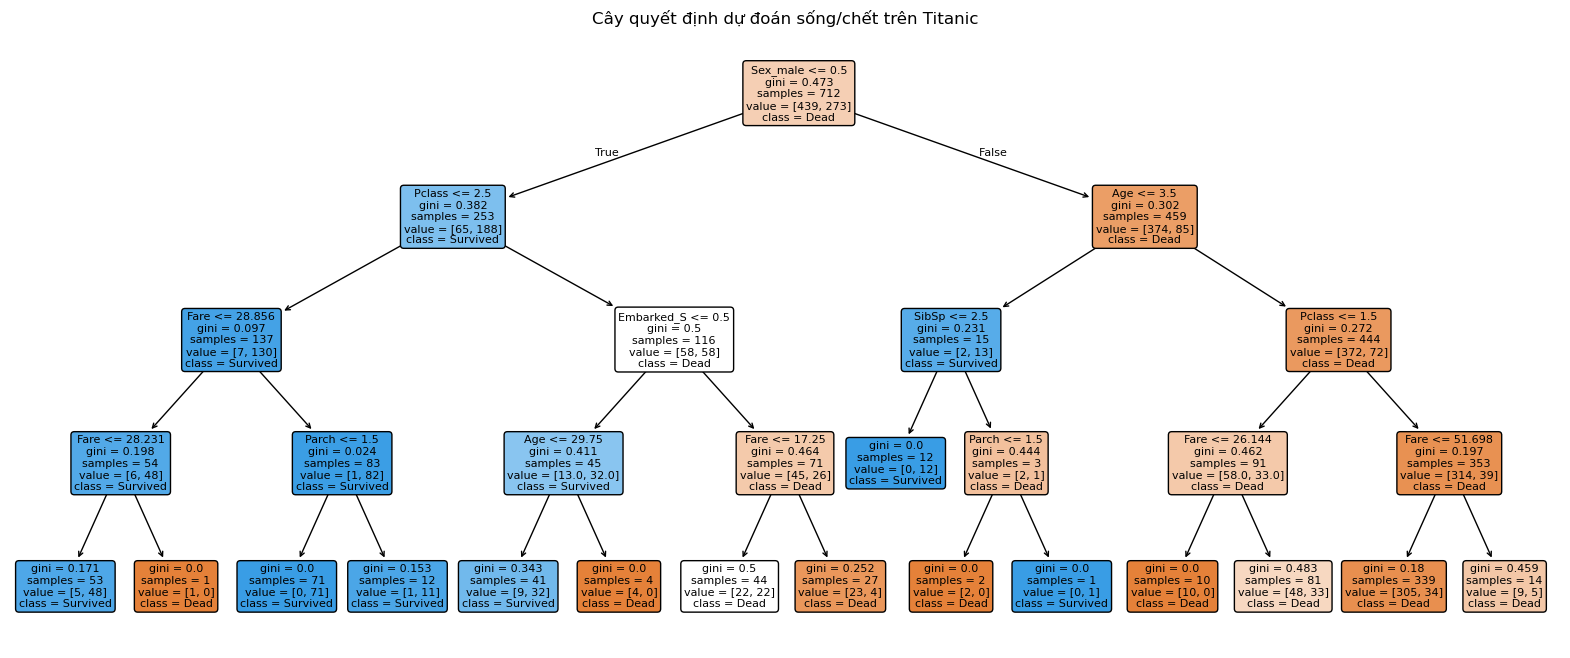

In [8]:
# (Tuỳ chọn) 6.1. Vẽ cây quyết định để đưa vào báo cáo

plt.figure(figsize=(20, 8))
plot_tree(
    dt_clf,
    feature_names=X_train.columns,
    class_names=["Dead", "Survived"],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Cây quyết định dự đoán sống/chết trên Titanic")
plt.show()


Mô hình được trực quan hoá bằng `plot_tree`:

- Gốc cây thường tách theo `Sex_male` (giới tính), sau đó là `Age`, `Pclass`, `Fare`, `Embarked`, `SibSp`, `Parch`…  
- Mỗi node hiển thị:
  - Điều kiện chia (vd: `Sex_male <= 0.5`, `Age <= 3.5`, …)  
  - Gini, số lượng mẫu, số mẫu từng lớp, và lớp quyết định (`Dead` hoặc `Survived`).

Biểu đồ này giúp giải thích rõ ràng **luật phân loại** mà mô hình học được từ dữ liệu Titanic

# 7. Xây dựng mô hình Rừng cây (Random Forest)

In [9]:
# ======================================================
# 7. Xây dựng mô hình Rừng cây (Random Forest)
# ======================================================

rf_clf = RandomForestClassifier(
    n_estimators=100,   # số lượng cây trong rừng
    max_depth=None,     # để None cho phép cây phát triển hết cỡ (có thể giới hạn lại nếu bị overfitting)
    random_state=42
)

# Huấn luyện
rf_clf.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred_rf = rf_clf.predict(X_test)

# Đánh giá mô hình
print("========== RANDOM FOREST ==========")
print("Accuracy trên tập test:", round(accuracy_score(y_test, y_pred_rf), 4))
print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification report:")
print(classification_report(y_test, y_pred_rf))


========== RANDOM FOREST ==========
Accuracy trên tập test: 0.8156

Confusion matrix:
[[96 14]
 [19 50]]

Classification report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.72      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



Mô hình Random Forest sử dụng:

- `n_estimators = 100` – số lượng cây quyết định trong rừng.  
- `max_depth = None` – cho phép cây phát triển sâu, có thể học được nhiều mẫu phức tạp hơn.  
- `random_state = 42`.

Sau khi huấn luyện:

- **Accuracy trên tập test ≈ 0.8156 (≈ 81.56%)** – cao hơn Decision Tree.

**Confusion matrix:**

\[
\begin{bmatrix}
96 & 14 \\
19 & 50
\end{bmatrix}
\]

- 96 hành khách **không sống sót** được dự đoán đúng, 14 bị dự đoán nhầm là **sống**.  
- 50 hành khách **sống sót** được dự đoán đúng, 19 bị dự đoán nhầm là **không sống**.

Từ `classification_report`:

- Lớp **0 (không sống sót)**:
  - Precision ≈ 0.83  
  - Recall ≈ 0.87  
  - F1-score ≈ 0.85  

- Lớp **1 (sống sót)**:
  - Precision ≈ 0.78  
  - Recall ≈ 0.72  
  - F1-score ≈ 0.75  

So với Decision Tree, mô hình Random Forest:

- **Tăng accuracy** từ ~78.8% lên ~81.6%.  
- **Cải thiện Recall cho lớp 1** (từ ~0.55 lên ~0.72), tức là dự đoán đúng nhiều người sống sót hơn.

# 8. Độ quan trọng của thuộc tính (Feature Importance)
- Rất hữu ích cho phần nhận xét trong báo cáo

Độ quan trọng của các thuộc tính:
Fare          0.278484
Sex_male      0.263240
Age           0.252361
Pclass        0.079478
SibSp         0.053489
Parch         0.041017
Embarked_S    0.023194
Embarked_Q    0.008736
dtype: float64


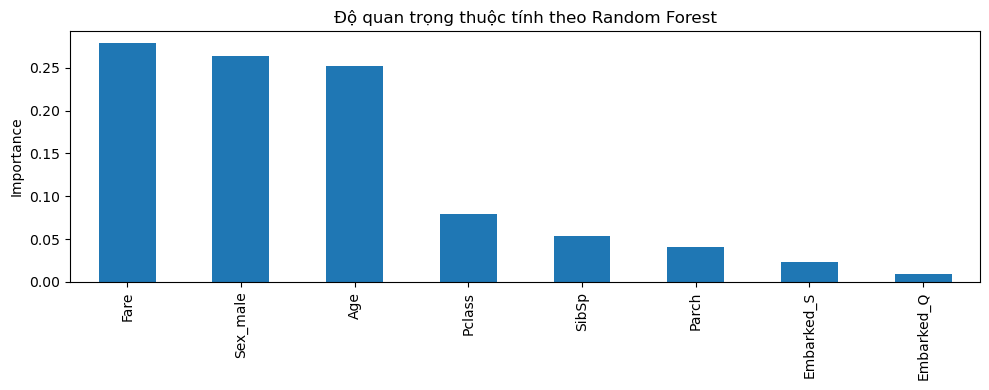

In [10]:
# ======================================================
# 8. Độ quan trọng của thuộc tính (Feature Importance)
#    - Rất hữu ích cho phần nhận xét trong báo cáo
# ======================================================

importances = rf_clf.feature_importances_
feat_imp = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

print("Độ quan trọng của các thuộc tính:")
print(feat_imp)

plt.figure(figsize=(10, 4))
feat_imp.plot(kind='bar')
plt.title("Độ quan trọng thuộc tính theo Random Forest")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


Random Forest cho phép trích xuất độ quan trọng của từng thuộc tính:

- Thuộc tính quan trọng nhất là **`Fare`**, tiếp theo là **`Sex_male`** và **`Age`**.  
- Các thuộc tính còn lại như `Pclass`, `SibSp`, `Parch`, `Embarked_S`, `Embarked_Q` có mức độ quan trọng thấp hơn.

Điều này phù hợp với trực giác:

- **Giới tính** và **tuổi** ảnh hưởng mạnh tới khả năng sống sót (ưu tiên “women and children first”).  
- **Hạng vé** và **giá vé** phản ánh điều kiện vị trí trên tàu, từ đó ảnh hưởng tới cơ hội lên xuồng cứu sinh.

Biểu đồ cột được vẽ từ `feat_imp.plot(kind='bar')` trực quan hoá rõ ràng thứ tự quan trọng của các thuộc tính.


# 9. Kết luận và so sánh mô hình

### Decision Tree

- Accuracy ≈ **78.77%**.  
- Dễ hiểu, có thể vẽ thành sơ đồ cây minh hoạ quá trình ra quyết định.  
- Tuy nhiên, mô hình dễ bị **overfitting** nếu cây quá sâu và kết quả có thể không ổn định giữa các lần train.

### Random Forest

- Accuracy ≈ **81.56%**, cao hơn Decision Tree.  
- Cải thiện Recall cho lớp “sống sót”, giúp mô hình nhận diện tốt hơn các hành khách sống sót.  
- Khó trực quan hoá toàn bộ (vì gồm nhiều cây), nhưng bù lại cung cấp **feature importance** để giải thích phần nào.

---

**Tổng kết:**  
Random Forest cho kết quả **tốt hơn** Decision Tree trên cùng bộ dữ liệu Titanic, thể hiện ưu điểm của phương pháp **ensemble** (kết hợp nhiều mô hình yếu thành một mô hình mạnh). Tuy vậy, Decision Tree vẫn có ưu thế về khả năng giải thích trực quan, phù hợp khi cần minh hoạ quy tắc ra quyết định cho người dùng cuối.